In [64]:
import pandas as pd

# import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
# warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [70]:
def load_old_feat():
    spammer_order = "../data/spammer_order.csv"
    feat_list = ['post_num', 'follower_num', 'followee_num', 'content_similar',
     'figure_jing', 'figure_url', 'figure_face', 'figure_RRT', 'figure_face_every',
     'figure_jing_every', 'figure_url_every', 'figure_url_single', 'figure_jing_single',
     'figure_at', 'figure_at_every', 'figure_at_single', 'average_repost', 'average_comm',
     'late_night_times', 'is_regular', 'shorttime_times', 'active_day_ratio', 'day_interval_variance',
     'day_in_variance', 'follow_ratio']

    raw_file = pd.read_csv(spammer_order)
    data = raw_file[feat_list]
    target = raw_file[['is_spammer']]
    return data, target

In [72]:
import load_new_feat as ld
# load previous data
# data, target = load_old_feat()
# load new crawlered data
data, target = ld.load_feat()
data['is_spammer'] = target

In [73]:
data['is_spammer'] = data['is_spammer'].map(dict(yes=1, no=0))
data['is_spammer'].value_counts()

1    858
0    858
Name: is_spammer, dtype: int64

In [74]:
data.head()

,post_num,follower_num,followee_num,content_similar,figure_jing,figure_url,figure_face,figure_RRT,figure_face_every,figure_jing_every,...,average_repost,average_comm,late_night_times,is_regular,shorttime_times,active_day_ratio,day_interval_variance,day_in_variance,follow_ratio,is_spammer
0,15809,84,235,6,0.168,0.124,0.000,0.319,0.000,0.200,...,0.005,0.005,0.000,1,9,1.000,0.174,0.151,2.79762,1
1,11248,595,1533,40,0.011,1.000,0.000,0.000,0.000,0.011,...,0.000,0.000,1.000,1,1,0.933,0.094,0.082,2.57647,1
2,10069,450,1909,179,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.938,1,2,0.941,0.163,0.077,4.24222,1
3,8078,168,1907,38,0.000,0.173,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1,1,0.857,0.043,0.099,11.35119,1
4,7389,173,1933,114,0.000,1.000,0.022,0.000,0.022,0.000,...,0.004,0.000,0.875,1,2,0.889,0.202,0.057,11.17341,1


In [75]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

/home/lzc/Common/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


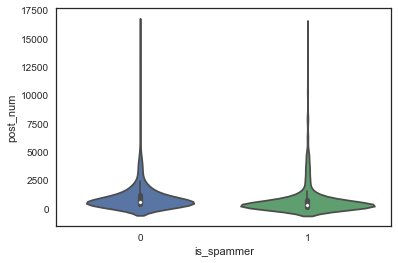

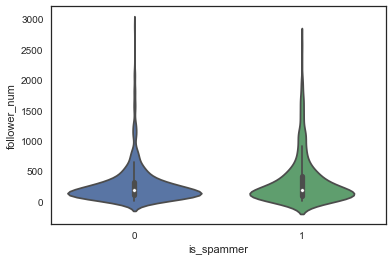

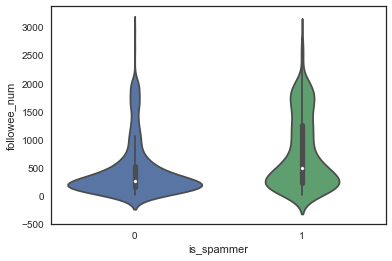

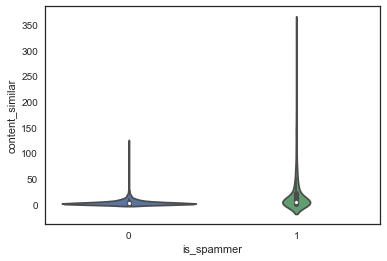

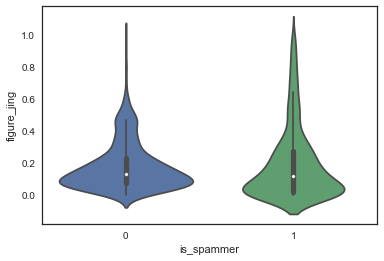

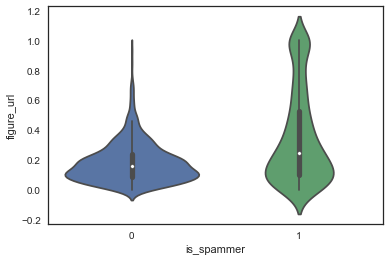

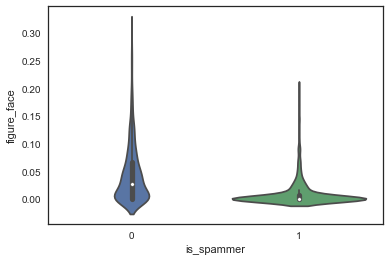

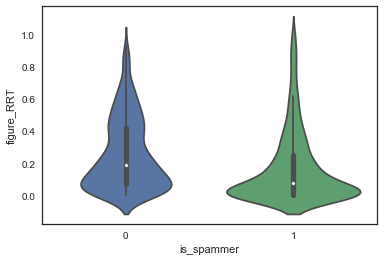

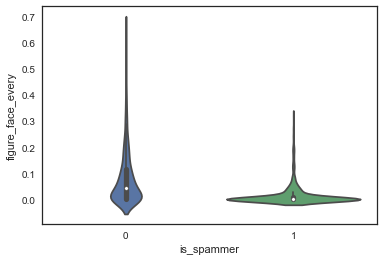

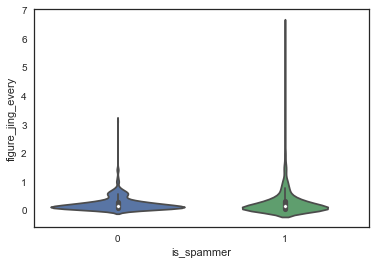

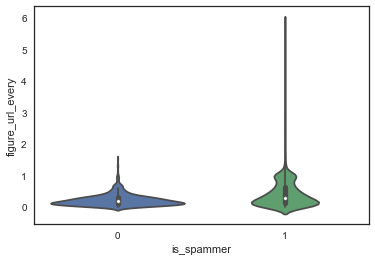

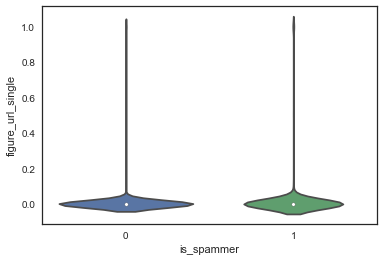

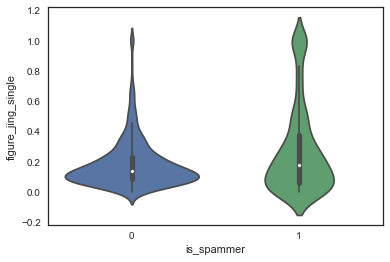

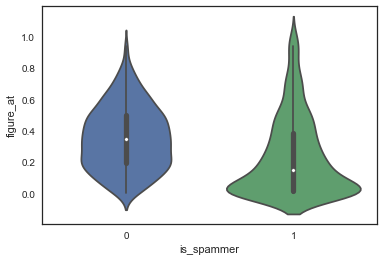

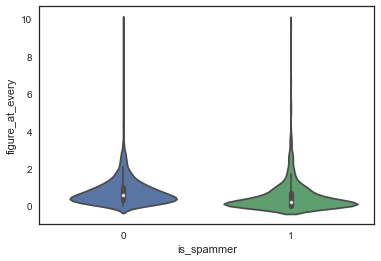

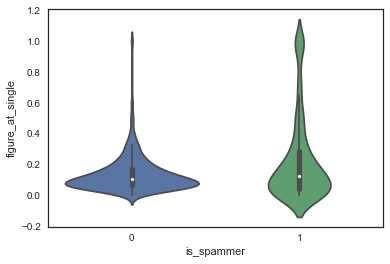

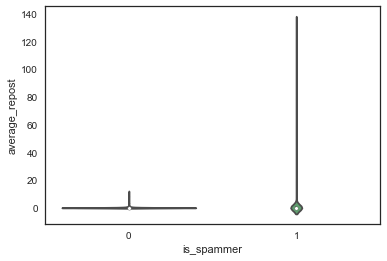

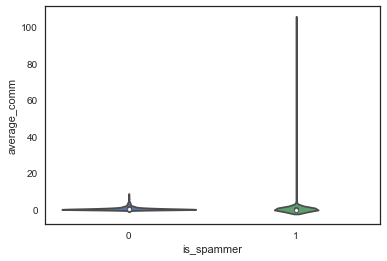

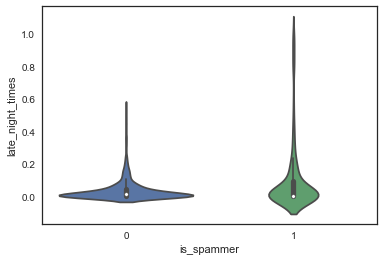

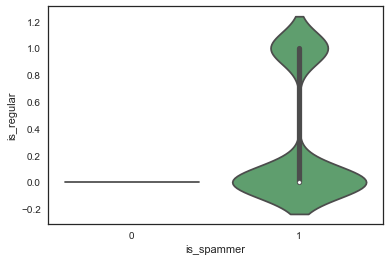

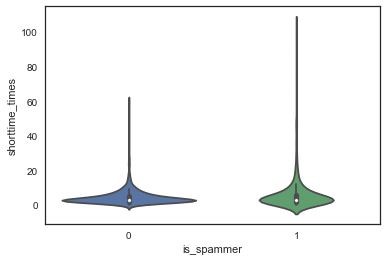

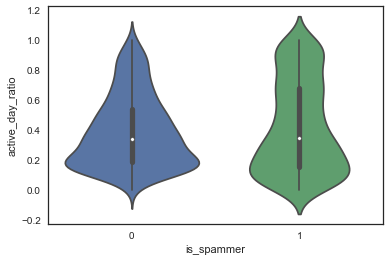

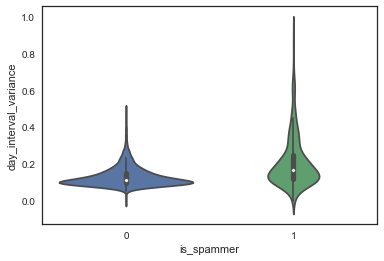

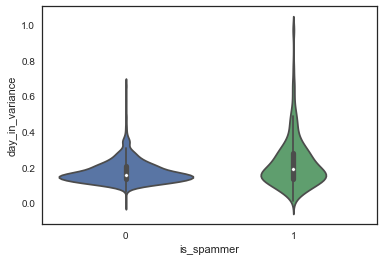

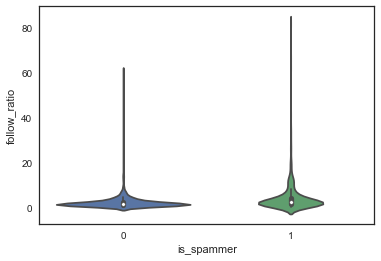

In [76]:
from IPython.display import display
for column_name in data.columns:
    if column_name != "is_spammer":
        # sns.boxplot(x="is_spammer", y="time_interval_var", data=data)
        fig, axes = plt.subplots()
        dis = sns.violinplot(x="is_spammer", y=column_name, data=data, size=6)        

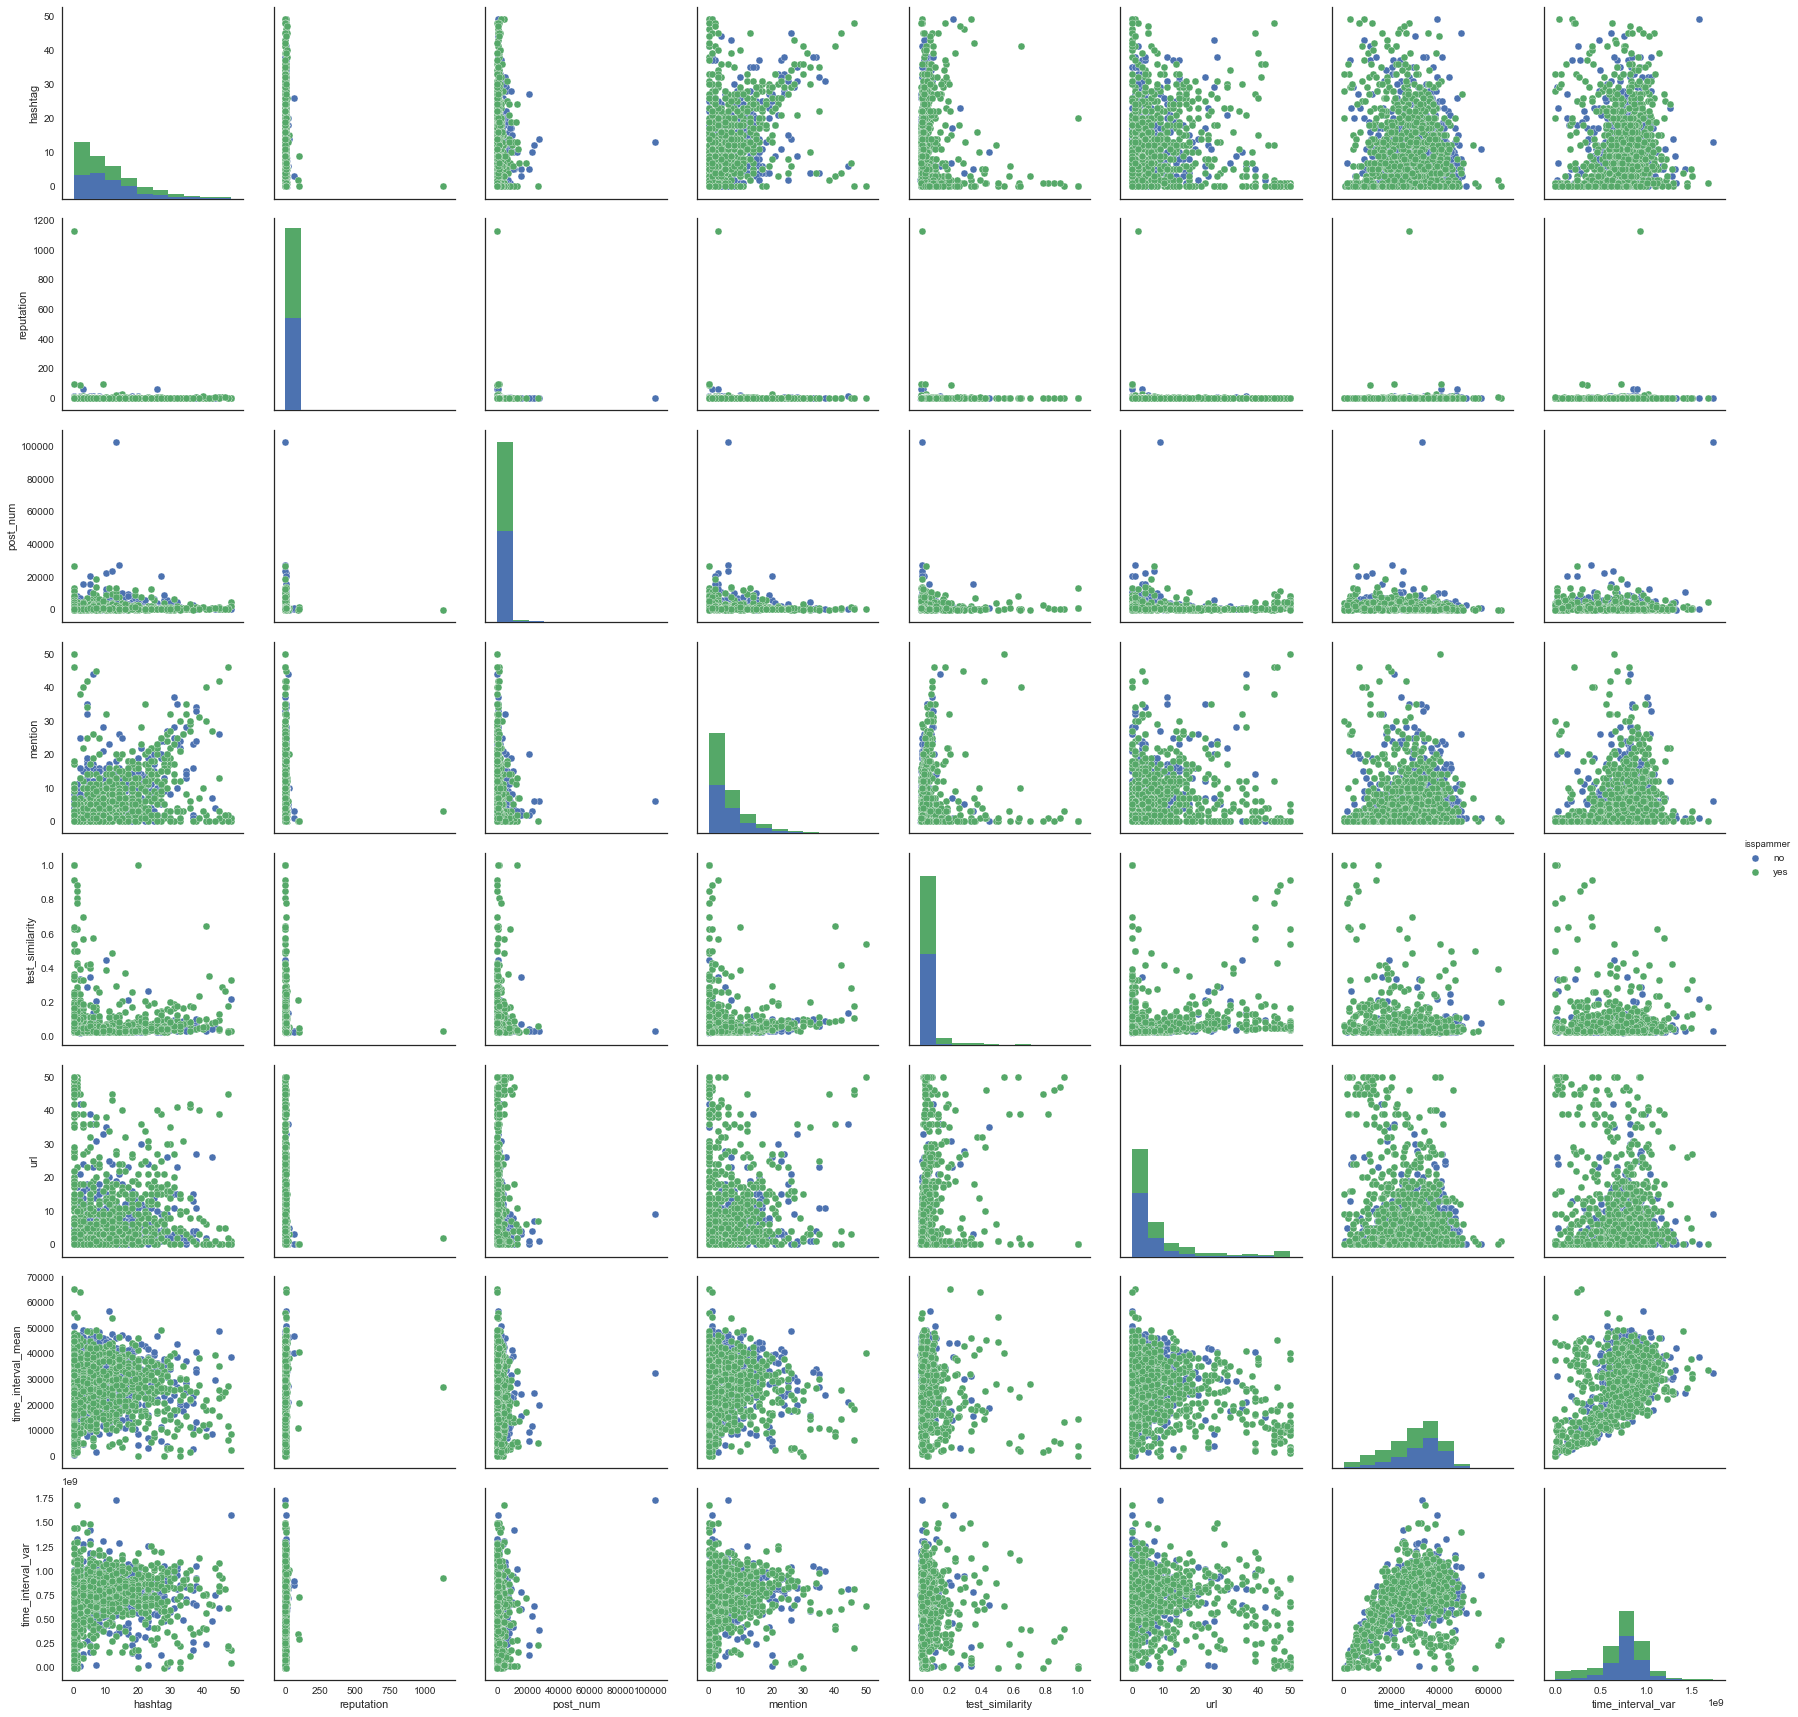

In [31]:
sns.pairplot(data, hue="is_spammer", size=3)